In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# cleaning
- check columns type
- check null values
- check for white spaces, (at the beginning and end)
- str columns- > lower case (remove case sensitivity)
.
.
.

- plot: 1 bin plot, stacked for transaction type, ..
- make plots pretty and readable 
- split code in different sections, add title
- concat columns, and use "hist" instead of group by


## Cleaning and EDA

### data processing and cleaning

In [42]:
fact_df = pd.read_csv("cleaned-data/fact_table.csv")
store_df = pd.read_csv("cleaned-data/store_dim.csv")
time_df = pd.read_csv("cleaned-data/time_dim.csv")
item_df = pd.read_csv("cleaned-data/item_dim.csv",sep = ";", encoding='cp1252')
customer_df = pd.read_csv("cleaned-data/customer_dim.csv",sep = ";")
trans_df = pd.read_csv("cleaned-data/trans_dim.csv")
# item_df[item_df['item_key'] == 'I00158']

In [14]:
# check data type of each dataframe
fact_df.dtypes,store_df.dtypes,time_df.dtypes,item_df.dtypes,customer_df.dtypes,trans_df.dtypes

(payment_key       object
 coustomer_key     object
 time_key          object
 item_key          object
 store_key         object
 quantity           int64
 unit              object
 unit_price       float64
 total_price      float64
 dtype: object,
 store_key    object
 division     object
 district     object
 upazila      object
 dtype: object,
 time_key    object
 date        object
 hour         int64
 day          int64
 week        object
 month        int64
 quarter     object
 year         int64
 dtype: object,
 item_key,item_name,desc,unit_price,man_country,supplier,unit    object
 dtype: object,
 coustomer_key,name,contact_no,nid    object
 dtype: object,
 payment_key    object
 trans_type     object
 bank_name      object
 dtype: object)

In [15]:
# check the null values for each dataframe
fact_nulls = fact_df.isnull().sum()
store_nulls = store_df.isnull().sum()
time_nulls = time_df.isnull().sum()
item_nulls = item_df.isnull().sum()
customer_nulls = customer_df.isnull().sum()
trans_nulls = trans_df.isnull().sum()


print("null values in fact_df:\n", fact_nulls)
print("\nnull values in store_df:\n", store_nulls)
print("\nnull values in time_df:\n", time_nulls)
print("\nnull values in item_df:\n", item_nulls)
print("\nnull values in customer_df:\n", customer_nulls)
print("\nnull values in trans_df:\n", trans_nulls)

null values in fact_df:
 payment_key         0
coustomer_key       0
time_key            0
item_key            0
store_key           0
quantity            0
unit             3723
unit_price          0
total_price         0
dtype: int64

null values in store_df:
 store_key    0
division     0
district     0
upazila      0
dtype: int64

null values in time_df:
 time_key    0
date        0
hour        0
day         0
week        0
month       0
quarter     0
year        0
dtype: int64

null values in item_df:
 item_key,item_name,desc,unit_price,man_country,supplier,unit    0
dtype: int64

null values in customer_df:
 coustomer_key,name,contact_no,nid    0
dtype: int64

null values in trans_df:
 payment_key    0
trans_type     0
bank_name      0
dtype: int64


<Axes: >

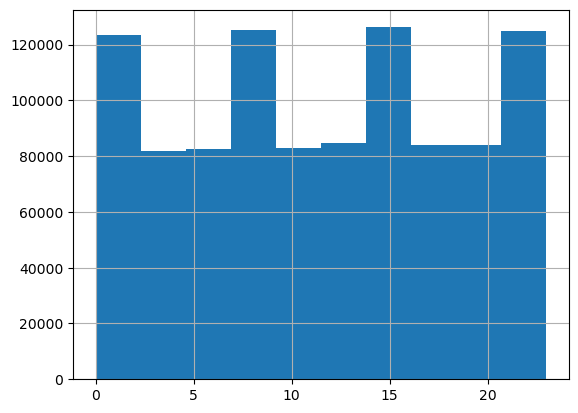

In [25]:
# which time of the day most trans happens
#(number of transactions by hour of the day)
merge_time_df = pd.merge(fact_df, time_df, on='time_key')
# group by hour and count the number of transactions
transactions_by_hour = merge_time_df['hour'].value_counts().sort_index()
# plot the number of transactions by hour
# transactions_by_hour.hist(x='hour', title = 'Number of transactions by hour of the day')
merge_time_df['hour'].hist()
# adjust the plot by using hist

In [38]:
coustomer_df

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323
...,...,...,...,...
9186,C009187,smt radha,8801563029753,1057824928189
9187,C009188,tulsi sharma,8801794982266,7970880905205
9188,C009189,madhubala,8801890032435,3101930298150
9189,C009190,pintu devi,8801563290767,7234328323528


In [33]:
# Drop unnecessary columns
dropped_col = ['customer_key', 'time_key', 'item_key', 'store_key',
               'quantity', 'unit_x', 'unit_price_x', 'total_price', 
               'unit_price_y', 'man_country', 'supplier', 'unit_y', 'bank_name']


fact_item_df = pd.merge(fact_df, item_df, on='item_key')
fact_item_pay_df = pd.merge(fact_item_df, trans_df, on='payment_key')
# group by 'item_name' and 'trans_type', then count the number of transactions
fact_item_pay_df['desc'] = fact_item_pay_df.desc.str.strip() # to strip the extra space for desc
transactions_by_item_type = fact_item_pay_df.groupby(['desc', 'trans_type']).size().reset_index(name='count')

# drop the unnecessary columns if they still exist (though they should not after groupby)
transactions_by_item_type = transactions_by_item_type.drop(columns=dropped_col, errors='ignore')
transactions_by_item_type

# adding sales for each trans_type

,desc,trans_type,count
0,Beverage - Energy/Protein,card,47538
1,Beverage - Energy/Protein,cash,1351
2,Beverage - Energy/Protein,mobile,4036
3,Beverage - Gatorade,card,33838
4,Beverage - Gatorade,cash,985
...,...,...,...
82,a. Beverage - Soda,cash,2917
83,a. Beverage - Soda,mobile,8499
84,a. Beverage Sparkling Water,card,71335
85,a. Beverage Sparkling Water,cash,1949


In [51]:
fact_item_df = pd.merge(fact_df, item_df, on='item_key')
fact_item_pay_df = pd.merge(fact_item_df, trans_df, on='payment_key')
fact_item_pay_cust_df = pd.merge(fact_item_pay_df, customer_df, on='coustomer_key')
# count the number of unique customers
unique_customers = fact_item_pay_cust_df['coustomer_key'].nunique()
unique_customers

9191

In [52]:
# the customer with the highest number of transactions
transactions_per_customer = fact_item_pay_cust_df['coustomer_key'].value_counts()
top_customer = transactions_per_customer.idxmax()
top_customer_transactions = fact_item_pay_cust_df[fact_item_pay_cust_df['coustomer_key'] == top_customer]
top_customer_transactions['coustomer_key'].value_counts()

C006906    156
Name: coustomer_key, dtype: int64

In [55]:
merged_df = fact_df.merge(time_df, on='time_key').merge(item_df, on='item_key')
#merged_df.head(2)
merged_df['year'].astype(str)+merged_df['quarter']

0         2016Q2
1         2015Q4
2         2020Q4
3         2015Q2
4         2020Q3
           ...  
999995    2016Q3
999996    2020Q1
999997    2015Q1
999998    2014Q2
999999    2020Q4
Length: 1000000, dtype: object

<Axes: xlabel='year_quarter'>

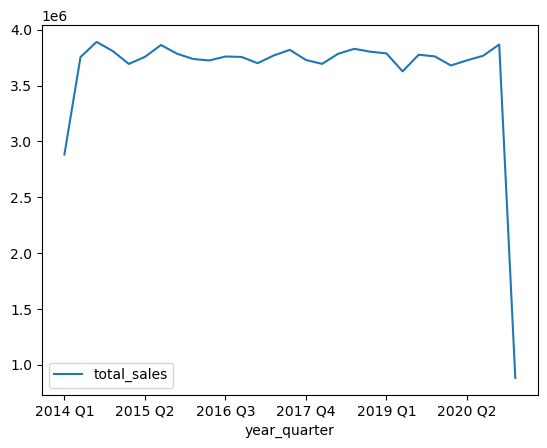

In [56]:
# What is the amount of sales per quarter in each year?

def sales_per_year(fact_df, time_df, item_df):
    merged_df = fact_df.merge(time_df, on='time_key').merge(item_df, on='item_key')
    yearly_sales_df = merged_df.groupby(['year','quarter'])['total_price'].sum()
    yearly_sales_df = yearly_sales_df.reset_index().rename(columns={'total_price': 'total_sales'})
    return yearly_sales_df

yearly_sales_df = sales_per_year(fact_df, time_df, item_df)
yearly_sales_df['year_quarter'] = yearly_sales_df['year'].astype(str) + " " + yearly_sales_df['quarter']
yearly_sales_df.plot.line(x="year_quarter", y="total_sales")


In [57]:
# What is the top supplier for each country, and how much does each supplier sell?

def top_supplier_per_country(fact_df, item_df):
    merged_df = fact_df.merge(item_df, on='item_key')
    supplier_sales_df = merged_df.groupby(['man_country', 'supplier'])['total_price'].sum()
    supplier_sales_df = supplier_sales_df.reset_index().rename(columns={'total_price': 'total_sales'})
    top_suppliers_df = supplier_sales_df.loc[supplier_sales_df.groupby('man_country')['total_sales'].idxmax()].reset_index(drop=True)
    return top_suppliers_df

top_suppliers_df = top_supplier_per_country(fact_df, item_df)
top_suppliers_df

,man_country,supplier,total_sales
0,Bangladesh,DENIMACH LTD,13337300.50
1,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,9463861.50
2,China,"CHERRY GROUP CO.,LTD",5992661.00
3,Finland,HARDFORD AB,9416792.25
4,Germany,Friedola 1888 GmbH,10957102.25
5,India,Indo Count Industries Ltd,13159323.25
6,Lithuania,BIGSO AB,11746920.00
7,Netherlands,Bolsius Boxmeer,10458204.00
8,United States,MAESA SAS,9892983.50
9,poland,CHROMADURLIN S.A.S,10976287.50


In [58]:
# Which supplier has the highest sales each year?

def top_supplier_per_year(fact_df, time_df, item_df):
    merged_df = fact_df.merge(time_df, on='time_key').merge(item_df, on='item_key')
    supplier_yearly_sales_df = merged_df.groupby(['year', 'supplier'])['total_price'].sum()
    supplier_yearly_sales_df = supplier_yearly_sales_df.reset_index().rename(columns={'total_price': 'total_sales'})
    top_suppliers_yearly_df = supplier_yearly_sales_df.loc[supplier_yearly_sales_df.groupby('year')['total_sales'].idxmax()].reset_index(drop=True)
    return top_suppliers_yearly_df

top_suppliers_yearly_df = top_supplier_per_year(fact_df, time_df, item_df)
top_suppliers_yearly_df

,year,supplier,total_sales
0,2014,DENIMACH LTD,1788469.00
1,2015,DENIMACH LTD,1918051.00
2,2016,DENIMACH LTD,1897250.00
3,2017,DENIMACH LTD,1896358.75
4,2018,DENIMACH LTD,1910265.25
5,2019,DENIMACH LTD,1915876.00
6,2020,Indo Count Industries Ltd,1905336.00
7,2021,DENIMACH LTD,115259.50


In [59]:
# Which products are the most sold in each store?

def top_products_per_store(fact_df, item_df):
    merged_df = fact_df.merge(item_df, on='item_key')
    top_products_df = merged_df.groupby(['store_key', 'item_name'])['quantity'].sum().reset_index()
    top_products_df = top_products_df.loc[top_products_df.groupby('store_key')['quantity'].idxmax()].reset_index(drop=True)
    return top_products_df

top_products_store_df = top_products_per_store(fact_df, item_df)
top_products_store_df

,store_key,item_name,quantity
0,S0001,Pepsi - 12 oz cans,92
1,S0002,Planters Nut-trition 1.5 oz,83
2,S0003,Sprite - 12 oz cans,122
3,S0004,Kind Bars Variety Pack 1.4 oz,79
4,S0005,Diet Coke - 12 oz cans,144
...,...,...,...
721,S0095,Pepsi - 12 oz cans,93
722,S0096,K Cups Hot Cocoa,98
723,S0097,Sprite - 12 oz cans,75
724,S0098,Diet Coke - 12 oz cans,103
